In [1]:
import bioframe
import pandas as pd
import numpy as np
import tensorflow as tf
from basenji import dna_io

2022-09-21 17:27:26.862945: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /spack/apps/linux-centos7-x86_64/gcc-8.3.0/python-3.9.2-uvcroioc4witkp6qf7mbebof5ix4wlb6/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/pmix-3.1.3-3sm6emyqaxapunh7rwbjvtaqoqe2e5z3/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openmpi-4.0.2-ipm3dnvlbtxawpi4ifz7jma6jgr7mexq/lib:/spack/apps/linux-centos7-x86_64/gcc-8.3.0/openblas-0.3.8-2no6mfziiclwxb7lstxoos335gnhjpes/lib:/spack/apps/gcc/8.3.0/lib64::/home1/smaruj/software/GSL/lib:/home1/smaruj/software/HTSLIB/lib
2022-09-21 17:27:26.862980: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
import akita_utils

In [3]:
filename = "/home1/smaruj/akita_utils/bin/insert_virtual_flanks_experiment/scd/scd.h5"
scd_stats = ["SCD", "INS-16"]

In [4]:
df = akita_utils.h5_to_df(filename, scd_stats, drop_duplicates_key="experiment_id")

7 duplicates removed for  /home1/smaruj/akita_utils/bin/insert_virtual_flanks_experiment/scd/scd.h5


In [5]:
is_strong = lambda x : True if (x > 20) else False
df["strong"] = df["genomic_SCD"].apply(is_strong)

In [6]:
df["SCD_average"] = (df["SCD_h1_m1_t0"] + df["SCD_h1_m1_t1"] + df["SCD_h1_m1_t2"] + df["SCD_h1_m1_t3"] + df["SCD_h1_m1_t4"] + df["SCD_h1_m1_t5"]) / 6
df["INS-16_average"] = (df["INS-16_h1_m1_t0"] + df["INS-16_h1_m1_t1"] + df["INS-16_h1_m1_t2"] + df["INS-16_h1_m1_t3"] + df["INS-16_h1_m1_t4"] + df["INS-16_h1_m1_t5"]) / 6

In [7]:
df

,INS-16_h1_m1_t0,INS-16_h1_m1_t1,INS-16_h1_m1_t2,INS-16_h1_m1_t3,INS-16_h1_m1_t4,INS-16_h1_m1_t5,SCD_h1_m1_t0,SCD_h1_m1_t1,SCD_h1_m1_t2,SCD_h1_m1_t3,...,experiment_id,flank_bp,genomic_SCD,orientation,spacer_bp,start,strand,strong,SCD_average,INS-16_average
0,-0.103333,-0.117065,-0.167847,-0.157593,-0.156128,-0.137085,29.140625,33.125000,48.34375,48.46875,...,0,0,53.66000,>>,90,35192359,-,True,40.84375,-0.139893
1,-0.085144,-0.080139,-0.145752,-0.142822,-0.130859,-0.121460,27.031250,28.250000,48.84375,49.84375,...,1,0,53.50000,>>,90,102781112,-,True,39.78125,-0.117737
2,-0.138794,-0.180176,-0.215088,-0.197998,-0.207764,-0.171631,34.250000,42.593750,51.06250,50.31250,...,2,0,53.30000,>>,90,49961991,-,True,45.25000,-0.185425
3,-0.056702,-0.032013,-0.101501,-0.109436,-0.088257,-0.092896,22.078125,20.578125,49.59375,51.65625,...,3,0,53.12000,>>,90,26776356,-,True,37.84375,-0.080078
4,-0.071594,-0.059906,-0.128296,-0.130005,-0.113647,-0.110535,25.031250,25.421875,48.93750,50.31250,...,4,0,53.06000,>>,90,51152589,-,True,38.90625,-0.102295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,-0.140991,-0.086365,-0.143921,-0.165161,-0.134155,-0.135864,43.968750,33.375000,58.68750,63.06250,...,6195,30,0.06000,>>,60,57783694,-,False,50.40625,-0.134399
6196,-0.141357,-0.087280,-0.145386,-0.166626,-0.135376,-0.136963,43.937500,33.406250,58.84375,63.21875,...,6196,30,0.06033,>>,60,94057464,+,False,50.53125,-0.135376
6197,-0.138062,-0.081726,-0.136963,-0.158691,-0.127808,-0.130127,44.125000,33.375000,58.50000,62.84375,...,6197,30,0.06070,>>,60,23157002,-,False,50.34375,-0.128906
6198,-0.141968,-0.088135,-0.146484,-0.167603,-0.136475,-0.138062,44.000000,33.406250,58.65625,63.03125,...,6198,30,0.06146,>>,60,102262359,-,False,50.40625,-0.136475


In [8]:
df.columns

Index(['INS-16_h1_m1_t0', 'INS-16_h1_m1_t1', 'INS-16_h1_m1_t2',
       'INS-16_h1_m1_t3', 'INS-16_h1_m1_t4', 'INS-16_h1_m1_t5', 'SCD_h1_m1_t0',
       'SCD_h1_m1_t1', 'SCD_h1_m1_t2', 'SCD_h1_m1_t3', 'SCD_h1_m1_t4',
       'SCD_h1_m1_t5', 'background_index', 'chrom', 'end', 'experiment_id',
       'flank_bp', 'genomic_SCD', 'orientation', 'spacer_bp', 'start',
       'strand', 'strong', 'SCD_average', 'INS-16_average'],
      dtype='object')

### SCD

In [9]:
SCD_strong = df[df["strong"] == True]
SCD_weak = df[df["strong"] == False]

In [10]:
SCD_strong.groupby("background_index")["SCD_average"].mean()

background_index
0     59.0625
1     66.5000
2     53.3750
3     83.1875
4     72.3125
5    105.4375
6     73.1875
7    112.6875
8     81.0000
9     81.6875
Name: SCD_average, dtype: float16

In [11]:
SCD_weak.groupby("background_index")["SCD_average"].mean()

background_index
0    37.96875
1    39.00000
2    39.00000
3    49.28125
4    43.12500
5    74.31250
6    44.43750
7    68.37500
8    46.31250
9    50.40625
Name: SCD_average, dtype: float16

Comment: It seems that 5th and 7th background sequences give higher values than others.
We can choose e.g. 3 background sequences (maybe just first 3) and conduct furture experiments on them

In [12]:
import matplotlib.pyplot as plt

In [24]:
SCD_strong_fl = []
SCD_weak_fl = []

for l in range(30):
    SCD_strong_fl.append(df[(df.strong == True) & (df.flank_bp == l)]["SCD_average"].mean())
    SCD_weak_fl.append(df[(df.strong == False) & (df.flank_bp == l)]["SCD_average"].mean())

In [50]:
colors_2 = ["#3B0FE8", "#E80F49"]

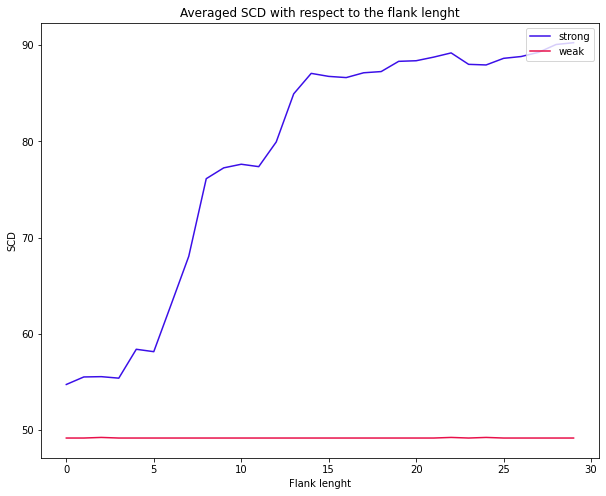

In [51]:
plt.figure(figsize=(10,8))
x = [x for x in range(30)]
plt.plot(x, SCD_strong_fl, label="strong", c=colors_2[0])
plt.plot(x, SCD_weak_fl, label="weak", c=colors_2[1])
plt.title("Averaged SCD with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
plt.legend(loc="upper right")

In [53]:
strong_colors_10 = ["#3B0FE8", "#5736DC", "#441CE5", "#3411C1", "#7A5DEC", "#6648DF", "#3919B7", "#3108D4", "#1F0EB5", "#4E41BD"]
weak_colors_10 = ["#E80F49", "#E92459", "#D01B4B", "#C61342", "#C94366", "#DB2555", "#E40842", "#CE0E41", "#E94772", "#F07293"]

In [56]:
SCD_strong_fl_bg = [[] for i in range(10)]
SCD_weak_fl_bg = [[] for i in range(10)]

for l in range(30):
    for b in range(10):
        SCD_strong_fl_bg[b].append(df[(df.strong == True) & (df.flank_bp == l) & (df.background_index == b)]["SCD_average"].mean())
        SCD_weak_fl_bg[b].append(df[(df.strong == False) & (df.flank_bp == l) & (df.background_index == b)]["SCD_average"].mean())

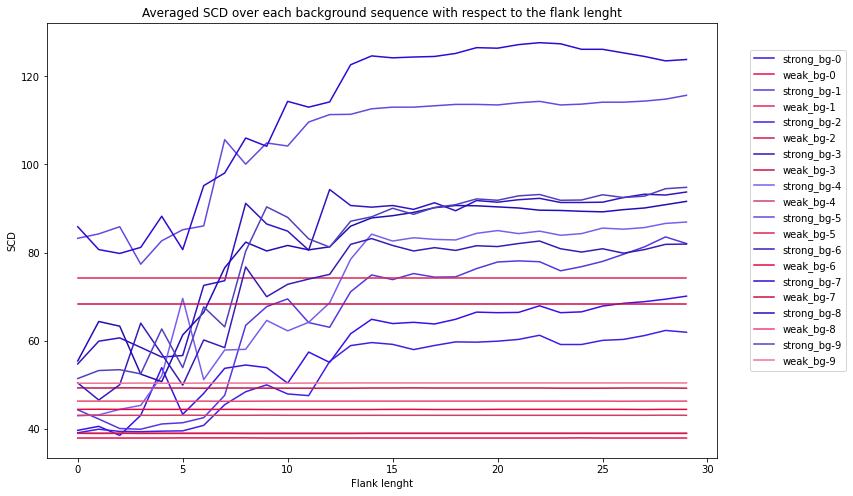

In [78]:
plt.figure(figsize=(12,8))
x = [x for x in range(30)]
for b in range(10):
    plt.plot(x, SCD_strong_fl_bg[b], label=f"strong_bg-{b}", c=strong_colors_10[b])
    plt.plot(x, SCD_weak_fl_bg[b], label=f"weak_bg-{b}", c=weak_colors_10[b])
plt.legend(loc="upper right")
plt.title("Averaged SCD over each background sequence with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("SCD")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

Comment: Tendecies are consistent among background sequences. Sequences flanking the CTCF-bingding motif doesn't have impact on SCD (and TAD boundary's strenght) if a CTCF is a weak motif, while adding flank of 15-20 bp around motif makes a motif stronger.

### INS-16

In [79]:
INS16_strong_fl = []
INS16_weak_fl = []

for l in range(30):
    INS16_strong_fl.append(df[(df.strong == True) & (df.flank_bp == l)]["INS-16_average"].mean())
    INS16_weak_fl.append(df[(df.strong == False) & (df.flank_bp == l)]["INS-16_average"].mean())

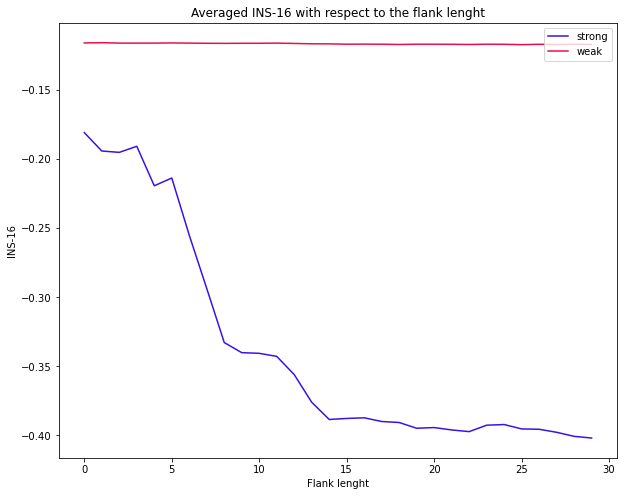

In [80]:
plt.figure(figsize=(10,8))
x = [x for x in range(30)]
plt.plot(x, INS16_strong_fl, label="strong", c=colors_2[0])
plt.plot(x, INS16_weak_fl, label="weak", c=colors_2[1])
plt.title("Averaged INS-16 with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("INS-16")
plt.legend(loc="upper right")

In [82]:
INS16_strong_fl_bg = [[] for i in range(10)]
INS16_weak_fl_bg = [[] for i in range(10)]

for l in range(30):
    for b in range(10):
        INS16_strong_fl_bg[b].append(df[(df.strong == True) & (df.flank_bp == l) & (df.background_index == b)]["INS-16_average"].mean())
        INS16_weak_fl_bg[b].append(df[(df.strong == False) & (df.flank_bp == l) & (df.background_index == b)]["INS-16_average"].mean())

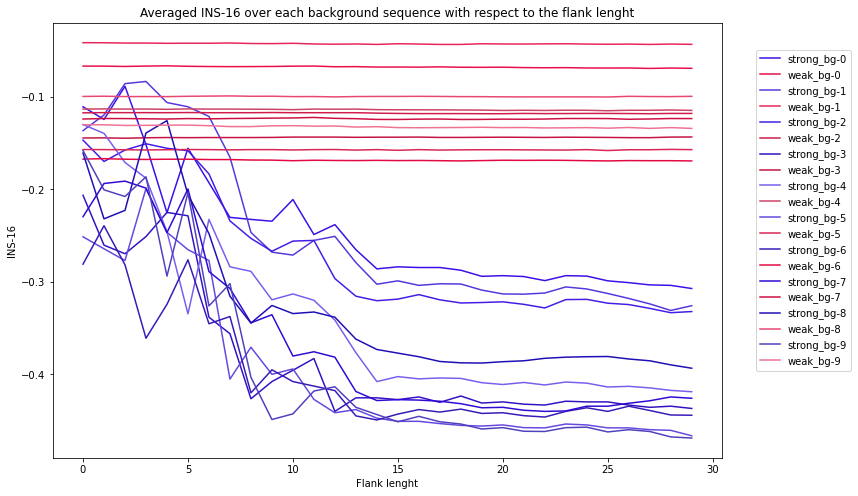

In [83]:
plt.figure(figsize=(12,8))
x = [x for x in range(30)]
for b in range(10):
    plt.plot(x, INS16_strong_fl_bg[b], label=f"strong_bg-{b}", c=strong_colors_10[b])
    plt.plot(x, INS16_weak_fl_bg[b], label=f"weak_bg-{b}", c=weak_colors_10[b])
plt.legend(loc="upper right")
plt.title("Averaged INS-16 over each background sequence with respect to the flank lenght")
plt.xlabel("Flank lenght")
plt.ylabel("INS-16")
# plt.legend(loc="upper right")
plt.legend(bbox_to_anchor=(1.2, 0.95), loc='upper right', ncol=1)

Comment: Insulation drops for strong sequences inserted with 15-20bp flanks and doesn't change with flank lenght when a motif is weak.